In [2]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import padding
import os
import time
import matplotlib.pyplot as plt
from decimal import Decimal

In [3]:
def encryptFile(filename, algorithm, mode, key) : 
    key = key.encode()
    backend = default_backend()

    cipher = Cipher(algorithm(key), mode, backend=backend)
    encryptor = cipher.encryptor()
    
    file = open('./' + filename, 'rb')
    plaintext = file.read()
    original_size = len(plaintext)
    
    if('AES' in str(algorithm)) :
        padding = len(plaintext) % 16
        plaintext += b" " * (16 - padding)
    
    elif('ECB' in str(mode) or 'CBC' in str(mode)) : 
        padding = len(plaintext) % 8
        plaintext += b" " * (8 - padding)
    
    ciphertext = encryptor.update(plaintext) + encryptor.finalize()

    return ciphertext, original_size


def decryptFile(ciphertext, size, algorithm, mode, key) : 
    key = key.encode()
    
    backend = default_backend()

    cipher = Cipher(algorithm(key), mode, backend=backend)
    decryptor = cipher.decryptor()
    
    plaintext = decryptor.update(ciphertext)

    return plaintext[:size]

------- AES-128-ECB -------
0.10653499999999999 MB
Average speed for encryption :  3.6834570656994474 MB/s
Average speed for decryption :  5.224367784870806 MB/s
1.008108 MB
Average speed for encryption :  21.393465136138026 MB/s
Average speed for decryption :  38.775839486744005 MB/s
10.007316 MB
Average speed for encryption :  23.594662878700355 MB/s
Average speed for decryption :  49.68657211793032 MB/s
100.007592 MB
Average speed for encryption :  14.915867756919809 MB/s
Average speed for decryption :  18.727878326856924 MB/s
[0.1, 1, 10, 100]
[3.6835, 21.3935, 23.5947, 14.9159]
[0.1, 1, 10, 100]
[5.2244, 38.7758, 49.6866, 18.7279]


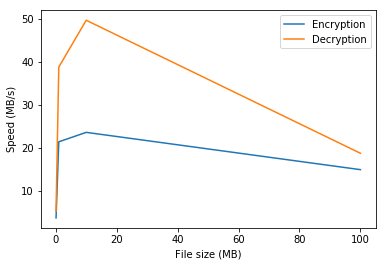

[0.1, 1, 10, 100]
[70.5053, 55.1722, 47.487, 79.6453]


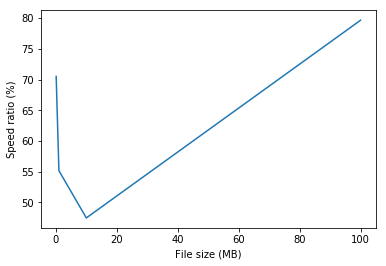

In [11]:
print('------- AES-128-ECB -------')

x_speed_enc = [0.1, 1, 10, 100]
y_speed_enc = []
y_speed_dec = []
y_speed_ratio = []


counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file100.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file100.txt', algorithms.AES, modes.ECB(), 'helloedfgh64edfg')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.AES, modes.ECB(), 'helloedfgh64edfg')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

avg_speed_enc_1 =  size/ counter_enc/5
avg_speed_dec_1 = size / counter_dec/5
avg_speed_ratio_1 = (avg_speed_enc_1 / avg_speed_dec_1) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_1), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_1), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_1), 4)))
print('Average speed for encryption : ', avg_speed_enc_1, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_1, 'MB/s')

counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file1.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file1.txt', algorithms.AES, modes.ECB(), 'helloedfgh64edfg')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.AES, modes.ECB(), 'helloedfgh64edfg')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

avg_speed_enc_2 =  size/ counter_enc/5
avg_speed_dec_2 = size / counter_dec/5
avg_speed_ratio_2 = (avg_speed_enc_2 / avg_speed_dec_2) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_2), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_2), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_2), 4)))
print('Average speed for encryption : ', avg_speed_enc_2, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_2, 'MB/s')

counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file10.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file10.txt', algorithms.AES, modes.ECB(), 'helloedfgh64edfg')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.AES, modes.ECB(), 'helloedfgh64edfg')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

avg_speed_enc_3 =  size/ counter_enc/5
avg_speed_dec_3 = size / counter_dec/5
avg_speed_ratio_3 = (avg_speed_enc_3 / avg_speed_dec_3) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_3), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_3), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_3), 4)))
print('Average speed for encryption : ', avg_speed_enc_3, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_3, 'MB/s')

counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file1000.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file1000.txt', algorithms.AES, modes.ECB(), 'helloedfgh64edfg')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.AES, modes.ECB(), 'helloedfgh64edfg')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

avg_speed_enc_4 =  size/ counter_enc/5
avg_speed_dec_4 = size / counter_dec/5
avg_speed_ratio_4 = (avg_speed_enc_4 / avg_speed_dec_4) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_4), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_4), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_4), 4)))
print('Average speed for encryption : ', avg_speed_enc_4, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_4, 'MB/s')


print(x_speed_enc)
print(y_speed_enc)

print(x_speed_enc)
print(y_speed_dec)
plt.plot(x_speed_enc, y_speed_enc, label='Encryption')
plt.plot(x_speed_enc, y_speed_dec, label='Decryption')
plt.xlabel('File size (MB)')
plt.ylabel('Speed (MB/s)')
plt.legend()
plt.show()

#plt.xlabel('File size (MB)')
#plt.ylabel('Decryption speed (MB/s)')
#plt.show()

print(x_speed_enc)
print(y_speed_ratio)
plt.plot(x_speed_enc, y_speed_ratio)
plt.xlabel('File size (MB)')
plt.ylabel('Speed ratio (%)')
plt.show()

------- AES-128-CBC -------
0.10653499999999999 MB
Average speed for encryption :  4.524505636289996 MB/s
Average speed for decryption :  5.699128584146419 MB/s
1.008108 MB
Average speed for encryption :  16.882182451617023 MB/s
Average speed for decryption :  55.97076466784036 MB/s
10.007316 MB
Average speed for encryption :  15.245460466136251 MB/s
Average speed for decryption :  39.18401927572851 MB/s
100.007592 MB
Average speed for encryption :  10.769442407333843 MB/s
Average speed for decryption :  16.624055574760312 MB/s
[0.1, 1, 10, 100]
[4.5245, 16.8822, 15.2455, 10.7694]
[0.1, 1, 10, 100]
[5.6991, 55.9708, 39.184, 16.6241]


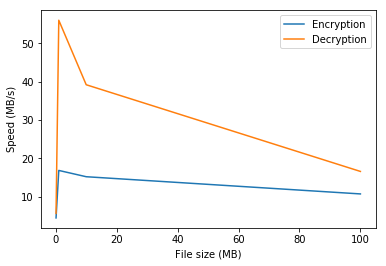

[0.1, 1, 10, 100]
[79.3894, 30.1625, 38.9073, 64.7823]


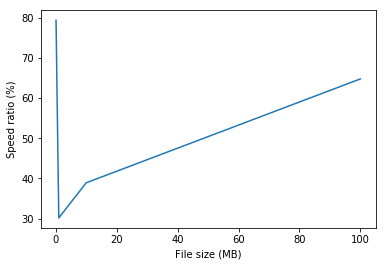

In [12]:
print('------- AES-128-CBC -------')

x_speed_enc = [0.1, 1, 10, 100]
y_speed_enc = []
y_speed_dec = []
y_speed_ratio = []

counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file100.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    iv = os.urandom(16)
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file100.txt', algorithms.AES, modes.CBC(iv), 'helloedfgh64edfg')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.AES, modes.CBC(iv), 'helloedfgh64edfg')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
    
avg_speed_enc_1 =  size/ counter_enc/5
avg_speed_dec_1 = size / counter_dec/5
avg_speed_ratio_1 = (avg_speed_enc_1 / avg_speed_dec_1) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_1), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_1), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_1), 4)))
print('Average speed for encryption : ', avg_speed_enc_1, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_1, 'MB/s')


counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file1.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    iv = os.urandom(16)
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file1.txt', algorithms.AES, modes.CBC(iv), 'helloedfgh64edfg')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.AES, modes.CBC(iv), 'helloedfgh64edfg')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
    
avg_speed_enc_2 =  size/ counter_enc/5
avg_speed_dec_2 = size / counter_dec/5
avg_speed_ratio_2 = (avg_speed_enc_2 / avg_speed_dec_2) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_2), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_2), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_2), 4)))
print('Average speed for encryption : ', avg_speed_enc_2, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_2, 'MB/s')


counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file10.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    iv = os.urandom(16)
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file10.txt', algorithms.AES, modes.CBC(iv), 'helloedfgh64edfg')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.AES, modes.CBC(iv), 'helloedfgh64edfg')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
    
avg_speed_enc_3 =  size/ counter_enc/5
avg_speed_dec_3 = size / counter_dec/5
avg_speed_ratio_3 = (avg_speed_enc_3 / avg_speed_dec_3) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_3), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_3), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_3), 4)))
print('Average speed for encryption : ', avg_speed_enc_3, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_3, 'MB/s')

counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file1000.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    iv = os.urandom(16)
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file1000.txt', algorithms.AES, modes.CBC(iv), 'helloedfgh64edfg')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.AES, modes.CBC(iv), 'helloedfgh64edfg')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
    
avg_speed_enc_4 =  size/ counter_enc/5
avg_speed_dec_4 = size / counter_dec/5
avg_speed_ratio_4 = (avg_speed_enc_4 / avg_speed_dec_4) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_4), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_4), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_4), 4)))
print('Average speed for encryption : ', avg_speed_enc_4, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_4, 'MB/s')


print(x_speed_enc)
print(y_speed_enc)

print(x_speed_enc)
print(y_speed_dec)
plt.plot(x_speed_enc, y_speed_enc, label='Encryption')
plt.plot(x_speed_enc, y_speed_dec, label='Decryption')
plt.xlabel('File size (MB)')
plt.ylabel('Speed (MB/s)')
plt.legend()
plt.show()

#plt.xlabel('File size (MB)')
#plt.ylabel('Decryption speed (MB/s)')
#plt.show()

print(x_speed_enc)
print(y_speed_ratio)
plt.plot(x_speed_enc, y_speed_ratio)
plt.xlabel('File size (MB)')
plt.ylabel('Speed ratio (%)')
plt.show()

------- Blowfish-ECB -------
0.10653499999999999 MB
Average speed for encryption :  1.702669905462305 MB/s
Average speed for decryption :  1.976644150402548 MB/s
1.008108 MB
Average speed for encryption :  3.9805987562317013 MB/s
Average speed for decryption :  4.455239016117969 MB/s
10.007316 MB
Average speed for encryption :  4.225612319940563 MB/s
Average speed for decryption :  4.657705202203141 MB/s
100.007592 MB
Average speed for encryption :  3.9845537684705845 MB/s
Average speed for decryption :  4.145446246372833 MB/s
[0.1, 1, 10, 100]
[1.7027, 3.9806, 4.2256, 3.9846]
[0.1, 1, 10, 100]
[1.9766, 4.4552, 4.6577, 4.1454]


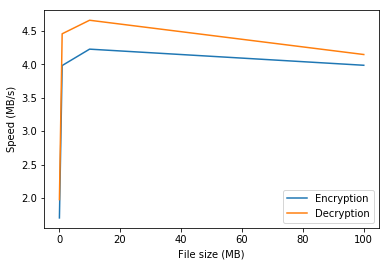

[0.1, 1, 10, 100]
[86.1394, 89.3465, 90.7231, 96.1188]


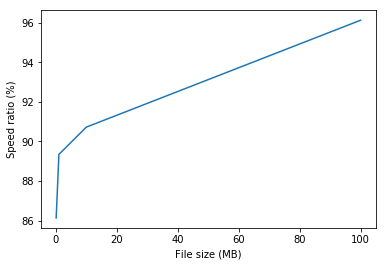

In [6]:
print('------- Blowfish-ECB -------')

x_speed_enc = [0.1, 1, 10, 100]
y_speed_enc = []
y_speed_dec = []
y_speed_ratio = []
counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file100.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file100.txt', algorithms.Blowfish, modes.ECB(), 'hello')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.Blowfish, modes.ECB(), 'hello')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
      
avg_speed_enc_1 =  size/ counter_enc/5
avg_speed_dec_1 = size / counter_dec/5
avg_speed_ratio_1 = (avg_speed_enc_1 / avg_speed_dec_1) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_1), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_1), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_1), 4)))
print('Average speed for encryption : ', avg_speed_enc_1, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_1, 'MB/s')

counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file1.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file1.txt', algorithms.Blowfish, modes.ECB(), 'hello')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.Blowfish, modes.ECB(), 'hello')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
      
avg_speed_enc_2 =  size/ counter_enc/5
avg_speed_dec_2 = size / counter_dec/5
avg_speed_ratio_2 = (avg_speed_enc_2 / avg_speed_dec_2) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_2), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_2), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_2), 4)))
print('Average speed for encryption : ', avg_speed_enc_2, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_2, 'MB/s')


counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file10.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file10.txt', algorithms.Blowfish, modes.ECB(), 'hello')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.Blowfish, modes.ECB(), 'hello')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
      
avg_speed_enc_3 =  size/ counter_enc/5
avg_speed_dec_3 = size / counter_dec/5
avg_speed_ratio_3 = (avg_speed_enc_3 / avg_speed_dec_3) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_3), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_3), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_3), 4)))
print('Average speed for encryption : ', avg_speed_enc_3, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_3, 'MB/s')

counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file1000.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file1000.txt', algorithms.Blowfish, modes.ECB(), 'hello')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.Blowfish, modes.ECB(), 'hello')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
      
avg_speed_enc_4 =  size/ counter_enc/5
avg_speed_dec_4 = size / counter_dec/5
avg_speed_ratio_4 = (avg_speed_enc_4 / avg_speed_dec_4) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_4), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_4), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_4), 4)))
print('Average speed for encryption : ', avg_speed_enc_4, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_4, 'MB/s')


print(x_speed_enc)
print(y_speed_enc)

print(x_speed_enc)
print(y_speed_dec)
plt.plot(x_speed_enc, y_speed_enc, label='Encryption')
plt.plot(x_speed_enc, y_speed_dec, label='Decryption')
plt.xlabel('File size (MB)')
plt.ylabel('Speed (MB/s)')
plt.legend()
plt.show()

#plt.xlabel('File size (MB)')
#plt.ylabel('Decryption speed (MB/s)')
#plt.show()

print(x_speed_enc)
print(y_speed_ratio)
plt.plot(x_speed_enc, y_speed_ratio)
plt.xlabel('File size (MB)')
plt.ylabel('Speed ratio (%)')
plt.show()

------- Blowfish-CBC -------
0.10653499999999999 MB
Average speed for encryption :  1.832927278708698 MB/s
Average speed for decryption :  2.0828796748240337 MB/s
1.008108 MB
Average speed for encryption :  3.8727893541234657 MB/s
Average speed for decryption :  4.809791113498387 MB/s
10.007316 MB
Average speed for encryption :  4.024631350606997 MB/s
Average speed for decryption :  4.9440356485586765 MB/s
100.007592 MB
Average speed for encryption :  3.862276262743947 MB/s
Average speed for decryption :  4.407327551659611 MB/s
[0.1, 1, 10, 100]
[1.8329, 3.8728, 4.0246, 3.8623]
[0.1, 1, 10, 100]
[2.0829, 4.8098, 4.944, 4.4073]


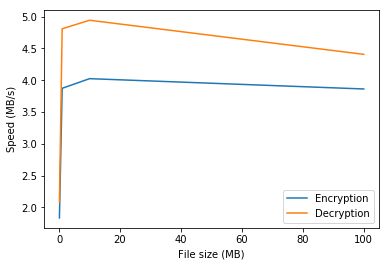

[0.1, 1, 10, 100]
[87.9997, 80.5189, 81.4038, 87.6331]


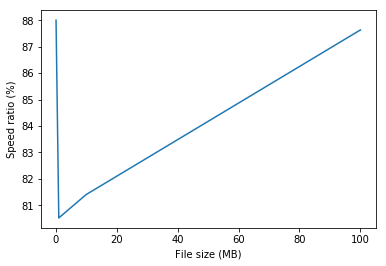

In [8]:
print('------- Blowfish-CBC -------')


x_speed_enc = [0.1, 1, 10, 100]
y_speed_enc = []
y_speed_dec = []
y_speed_ratio = []
counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file100.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    iv = os.urandom(8)
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file100.txt', algorithms.Blowfish, modes.CBC(iv), 'hello')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.Blowfish, modes.CBC(iv), 'hello')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

avg_speed_enc_1 =  size/ counter_enc/5
avg_speed_dec_1 = size / counter_dec/5
avg_speed_ratio_1 = (avg_speed_enc_1 / avg_speed_dec_1) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_1), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_1), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_1), 4)))
print('Average speed for encryption : ', avg_speed_enc_1, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_1, 'MB/s')



counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file1.txt')*10**-6
print(size, 'MB')
    
for i in range(5) :
    iv = os.urandom(8)
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file1.txt', algorithms.Blowfish, modes.CBC(iv), 'hello')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.Blowfish, modes.CBC(iv), 'hello')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

avg_speed_enc_2 =  size/ counter_enc/5
avg_speed_dec_2 = size / counter_dec/5
avg_speed_ratio_2 = (avg_speed_enc_2 / avg_speed_dec_2) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_2), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_2), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_2), 4)))
print('Average speed for encryption : ', avg_speed_enc_2, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_2, 'MB/s')

counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file10.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    iv = os.urandom(8)
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file10.txt', algorithms.Blowfish, modes.CBC(iv), 'hello')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.Blowfish, modes.CBC(iv), 'hello')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    
avg_speed_enc_3 =  size/ counter_enc/5
avg_speed_dec_3 = size / counter_dec/5
avg_speed_ratio_3 = (avg_speed_enc_3 / avg_speed_dec_3) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_3), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_3), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_3), 4)))
print('Average speed for encryption : ', avg_speed_enc_3, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_3, 'MB/s')


counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file1000.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    iv = os.urandom(8)
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file1000.txt', algorithms.Blowfish, modes.CBC(iv), 'hello')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.Blowfish, modes.CBC(iv), 'hello')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    
avg_speed_enc_4 =  size/ counter_enc/5
avg_speed_dec_4 = size / counter_dec/5
avg_speed_ratio_4 = (avg_speed_enc_4 / avg_speed_dec_4) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_4), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_4), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_4), 4)))
print('Average speed for encryption : ', avg_speed_enc_4, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_4, 'MB/s')

print(x_speed_enc)
print(y_speed_enc)

print(x_speed_enc)
print(y_speed_dec)
plt.plot(x_speed_enc, y_speed_enc, label='Encryption')
plt.plot(x_speed_enc, y_speed_dec, label='Decryption')
plt.xlabel('File size (MB)')
plt.ylabel('Speed (MB/s)')
plt.legend()
plt.show()

#plt.xlabel('File size (MB)')
#plt.ylabel('Decryption speed (MB/s)')
#plt.show()

print(x_speed_enc)
print(y_speed_ratio)
plt.plot(x_speed_enc, y_speed_ratio)
plt.xlabel('File size (MB)')
plt.ylabel('Speed ratio (%)')
plt.show()

------- 3DES-ECB -------
0.10653499999999999 MB
Average speed for encryption :  0.6731345494863065 MB/s
Average speed for decryption :  0.7429381937650676 MB/s
1.008108 MB
Average speed for encryption :  1.0059970942510357 MB/s
Average speed for decryption :  1.0204513057175335 MB/s
10.007316 MB
Average speed for encryption :  1.0271405954822304 MB/s
Average speed for decryption :  1.0516831331729097 MB/s
100.007592 MB
Average speed for encryption :  1.015778661778143 MB/s
Average speed for decryption :  1.0195512060412937 MB/s
[0.1, 1, 10, 100]
[0.6731, 1.006, 1.0271, 1.0158]
[0.1, 1, 10, 100]
[0.7429, 1.0205, 1.0517, 1.0196]


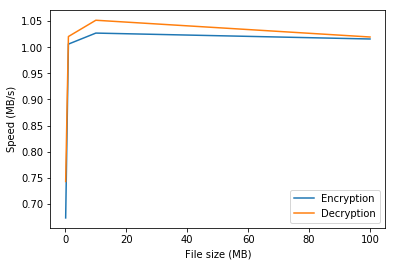

[0.1, 1, 10, 100]
[90.6044, 98.5835, 97.6664, 99.63]


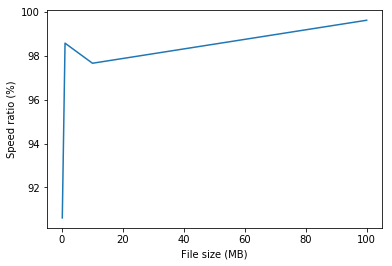

In [9]:
print('------- 3DES-ECB -------')
x_speed_enc = [0.1, 1, 10, 100]
y_speed_enc = []
y_speed_dec = []
y_speed_ratio = []

counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file100.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file100.txt', algorithms.TripleDES, modes.ECB(), 'helloooo')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.TripleDES, modes.ECB(), 'helloooo')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
    
avg_speed_enc_1 =  size/ counter_enc/5
avg_speed_dec_1 = size / counter_dec/5
avg_speed_ratio_1 = (avg_speed_enc_1 / avg_speed_dec_1) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_1), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_1), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_1), 4)))
print('Average speed for encryption : ', avg_speed_enc_1, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_1, 'MB/s')    


counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file1.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file1.txt', algorithms.TripleDES, modes.ECB(), 'helloooo')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.TripleDES, modes.ECB(), 'helloooo')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
    
avg_speed_enc_2 =  size/ counter_enc/5
avg_speed_dec_2 = size / counter_dec/5
avg_speed_ratio_2 = (avg_speed_enc_2 / avg_speed_dec_2) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_2), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_2), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_2), 4)))
print('Average speed for encryption : ', avg_speed_enc_2, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_2, 'MB/s')   

counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file10.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file10.txt', algorithms.TripleDES, modes.ECB(), 'helloooo')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.TripleDES, modes.ECB(), 'helloooo')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
    
avg_speed_enc_3 =  size/ counter_enc/5
avg_speed_dec_3 = size / counter_dec/5
avg_speed_ratio_3 = (avg_speed_enc_3 / avg_speed_dec_3) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_3), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_3), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_3), 4)))
print('Average speed for encryption : ', avg_speed_enc_3, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_3, 'MB/s')    

counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file1000.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file1000.txt', algorithms.TripleDES, modes.ECB(), 'helloooo')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.TripleDES, modes.ECB(), 'helloooo')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
    
avg_speed_enc_4 =  size/ counter_enc/5
avg_speed_dec_4 = size / counter_dec/5
avg_speed_ratio_4 = (avg_speed_enc_4 / avg_speed_dec_4) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_4), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_4), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_4), 4)))
print('Average speed for encryption : ', avg_speed_enc_4, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_4, 'MB/s')    


print(x_speed_enc)
print(y_speed_enc)

print(x_speed_enc)
print(y_speed_dec)
plt.plot(x_speed_enc, y_speed_enc, label='Encryption')
plt.plot(x_speed_enc, y_speed_dec, label='Decryption')
plt.xlabel('File size (MB)')
plt.ylabel('Speed (MB/s)')
plt.legend()
plt.show()

#plt.xlabel('File size (MB)')
#plt.ylabel('Decryption speed (MB/s)')
#plt.show()

print(x_speed_enc)
print(y_speed_ratio)
plt.plot(x_speed_enc, y_speed_ratio)
plt.xlabel('File size (MB)')
plt.ylabel('Speed ratio (%)')
plt.show()

------- 3DES-CBC -------
0.10653499999999999 MB
Average speed for encryption :  0.7374999820758064 MB/s
Average speed for decryption :  0.8188160058638665 MB/s
1.008108 MB
Average speed for encryption :  0.9684257408282317 MB/s
Average speed for decryption :  1.0145029689857998 MB/s
10.007316 MB
Average speed for encryption :  1.0298707286655158 MB/s
Average speed for decryption :  1.0644938125116248 MB/s
100.007592 MB
Average speed for encryption :  0.9848090232496729 MB/s
Average speed for decryption :  1.0140374958967202 MB/s
[0.1, 1, 10, 100]
[0.7375, 0.9684, 1.0299, 0.9848]
[0.1, 1, 10, 100]
[0.8188, 1.0145, 1.0645, 1.014]


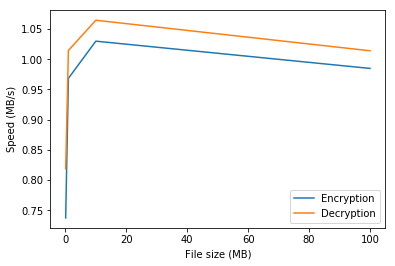

[0.1, 1, 10, 100]
[90.0691, 95.4581, 96.7475, 97.1176]


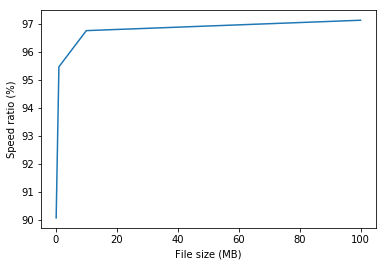

In [10]:
print('------- 3DES-CBC -------')

x_speed_enc = [0.1, 1, 10, 100]
y_speed_enc = []
y_speed_dec = []
y_speed_ratio = []

counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file100.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    iv = os.urandom(8)
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file100.txt', algorithms.TripleDES, modes.CBC(iv), 'helloooo')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.TripleDES, modes.CBC(iv), 'helloooo')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
    
avg_speed_enc_1 =  size/ counter_enc/5
avg_speed_dec_1 = size / counter_dec/5
avg_speed_ratio_1 = (avg_speed_enc_1 / avg_speed_dec_1) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_1), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_1), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_1), 4)))
print('Average speed for encryption : ', avg_speed_enc_1, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_1, 'MB/s')    

counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file1.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    iv = os.urandom(8)
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file1.txt', algorithms.TripleDES, modes.CBC(iv), 'helloooo')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.TripleDES, modes.CBC(iv), 'helloooo')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
    
avg_speed_enc_2 =  size/ counter_enc/5
avg_speed_dec_2 = size / counter_dec/5
avg_speed_ratio_2 = (avg_speed_enc_2 / avg_speed_dec_2) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_2), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_2), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_2), 4)))
print('Average speed for encryption : ', avg_speed_enc_2, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_2, 'MB/s')    


counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file10.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    iv = os.urandom(8)
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file10.txt', algorithms.TripleDES, modes.CBC(iv), 'helloooo')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.TripleDES, modes.CBC(iv), 'helloooo')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
    
avg_speed_enc_3 =  size/ counter_enc/5
avg_speed_dec_3 = size / counter_dec/5
avg_speed_ratio_3 = (avg_speed_enc_3 / avg_speed_dec_3) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_3), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_3), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_3), 4)))
print('Average speed for encryption : ', avg_speed_enc_3, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_3, 'MB/s')

counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file1000.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    iv = os.urandom(8)
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file1000.txt', algorithms.TripleDES, modes.CBC(iv), 'helloooo')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.TripleDES, modes.CBC(iv), 'helloooo')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
    
avg_speed_enc_4 =  size/ counter_enc/5
avg_speed_dec_4 = size / counter_dec/5
avg_speed_ratio_4 = (avg_speed_enc_4 / avg_speed_dec_4) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_4), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_4), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_4), 4)))
print('Average speed for encryption : ', avg_speed_enc_4, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_4, 'MB/s')


print(x_speed_enc)
print(y_speed_enc)

print(x_speed_enc)
print(y_speed_dec)
plt.plot(x_speed_enc, y_speed_enc, label='Encryption')
plt.plot(x_speed_enc, y_speed_dec, label='Decryption')
plt.xlabel('File size (MB)')
plt.ylabel('Speed (MB/s)')
plt.legend()
plt.show()

#plt.xlabel('File size (MB)')
#plt.ylabel('Decryption speed (MB/s)')
#plt.show()

print(x_speed_enc)
print(y_speed_ratio)
plt.plot(x_speed_enc, y_speed_ratio)
plt.xlabel('File size (MB)')
plt.ylabel('Speed ratio (%)')
plt.show()

------- Idea-ECB -------
0.10653499999999999 MB
Average speed for encryption :  1.6431874405280673 MB/s
Average speed for decryption :  1.677170598254668 MB/s
1.008108 MB
Average speed for encryption :  2.4777827100258425 MB/s
Average speed for decryption :  2.6944448162725343 MB/s
10.007316 MB
Average speed for encryption :  3.006171201764724 MB/s
Average speed for decryption :  3.3084734195255123 MB/s
100.007592 MB
Average speed for encryption :  2.8541350794634694 MB/s
Average speed for decryption :  2.947761582528735 MB/s
[0.1, 1, 10, 100]
[1.6432, 2.4778, 3.0062, 2.8541]
[0.1, 1, 10, 100]
[1.6772, 2.6944, 3.3085, 2.9478]


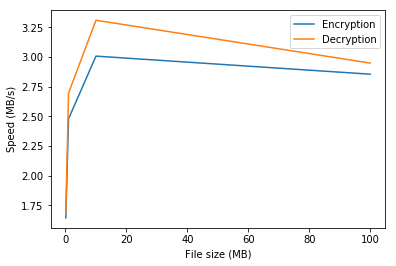

[0.1, 1, 10, 100]
[97.9738, 91.9589, 90.8628, 96.8238]


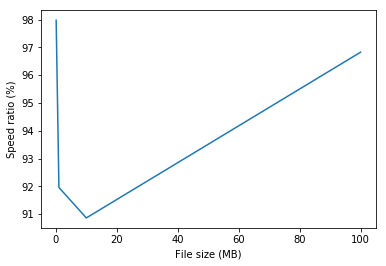

In [14]:
print('------- Idea-ECB -------')

x_speed_enc = [0.1, 1, 10, 100]
y_speed_enc = []
y_speed_dec = []
y_speed_ratio = []

counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file100.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file100.txt', algorithms.IDEA, modes.ECB(), 'helloworld!!!!!!')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.IDEA, modes.ECB(), 'helloworld!!!!!!')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
    
avg_speed_enc_1 =  size/ counter_enc/5
avg_speed_dec_1 = size / counter_dec/5
avg_speed_ratio_1 = (avg_speed_enc_1 / avg_speed_dec_1) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_1), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_1), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_1), 4)))
print('Average speed for encryption : ', avg_speed_enc_1, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_1, 'MB/s') 


counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file1.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file1.txt', algorithms.IDEA, modes.ECB(), 'helloworld!!!!!!')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.IDEA, modes.ECB(), 'helloworld!!!!!!')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
    
avg_speed_enc_2 =  size/ counter_enc/5
avg_speed_dec_2 = size / counter_dec/5
avg_speed_ratio_2 = (avg_speed_enc_2 / avg_speed_dec_2) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_2), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_2), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_2), 4)))
print('Average speed for encryption : ', avg_speed_enc_2, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_2, 'MB/s') 


counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file10.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file10.txt', algorithms.IDEA, modes.ECB(), 'helloworld!!!!!!')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.IDEA, modes.ECB(), 'helloworld!!!!!!')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
    
avg_speed_enc_3 =  size/ counter_enc/5
avg_speed_dec_3 = size / counter_dec/5
avg_speed_ratio_3 = (avg_speed_enc_3 / avg_speed_dec_3) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_3), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_3), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_3), 4)))
print('Average speed for encryption : ', avg_speed_enc_3, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_3, 'MB/s') 


counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file1000.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file1000.txt', algorithms.IDEA, modes.ECB(), 'helloworld!!!!!!')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.IDEA, modes.ECB(), 'helloworld!!!!!!')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
    
avg_speed_enc_4 =  size/ counter_enc/5
avg_speed_dec_4 = size / counter_dec/5
avg_speed_ratio_4 = (avg_speed_enc_4 / avg_speed_dec_4) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_4), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_4), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_4), 4)))
print('Average speed for encryption : ', avg_speed_enc_4, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_4, 'MB/s') 


print(x_speed_enc)
print(y_speed_enc)

print(x_speed_enc)
print(y_speed_dec)
plt.plot(x_speed_enc, y_speed_enc, label='Encryption')
plt.plot(x_speed_enc, y_speed_dec, label='Decryption')
plt.xlabel('File size (MB)')
plt.ylabel('Speed (MB/s)')
plt.legend()
plt.show()

#plt.xlabel('File size (MB)')
#plt.ylabel('Decryption speed (MB/s)')
#plt.show()

print(x_speed_enc)
print(y_speed_ratio)
plt.plot(x_speed_enc, y_speed_ratio)
plt.xlabel('File size (MB)')
plt.ylabel('Speed ratio (%)')
plt.show()




------- Idea-CBC -------
0.10653499999999999 MB
Average speed for encryption :  1.6237220030887187 MB/s
Average speed for decryption :  1.7164375087004953 MB/s
1.008108 MB
Average speed for encryption :  2.8744957710579717 MB/s
Average speed for decryption :  3.257872612410286 MB/s
10.007316 MB
Average speed for encryption :  2.848427211775983 MB/s
Average speed for decryption :  3.3236077167102764 MB/s
100.007592 MB
Average speed for encryption :  2.741410830566822 MB/s
Average speed for decryption :  3.0031774125549626 MB/s
[0.1, 1, 10, 100]
[1.6237, 2.8745, 2.8484, 2.7414]
[0.1, 1, 10, 100]
[1.7164, 3.2579, 3.3236, 3.0032]


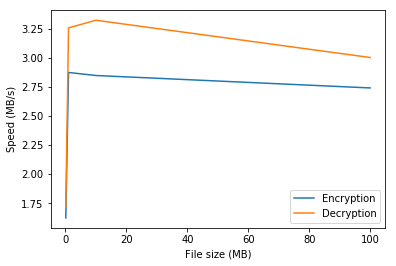

[0.1, 1, 10, 100]
[94.5984, 88.2323, 85.7029, 91.2837]


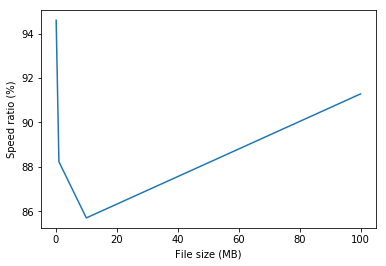

In [16]:
print('------- Idea-CBC -------')

x_speed_enc = [0.1, 1, 10, 100]
y_speed_enc = []
y_speed_dec = []
y_speed_ratio = []

counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file100.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    iv = os.urandom(8)
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file100.txt', algorithms.IDEA, modes.CBC(iv), 'helloworld!!!!!!')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.IDEA, modes.CBC(iv), 'helloworld!!!!!!')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
    
avg_speed_enc_1 =  size/ counter_enc/5
avg_speed_dec_1 = size / counter_dec/5
avg_speed_ratio_1 = (avg_speed_enc_1 / avg_speed_dec_1) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_1), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_1), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_1), 4)))
print('Average speed for encryption : ', avg_speed_enc_1, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_1, 'MB/s') 


counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file1.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    iv = os.urandom(8)
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file1.txt', algorithms.IDEA, modes.CBC(iv), 'helloworld!!!!!!')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.IDEA, modes.CBC(iv), 'helloworld!!!!!!')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
    
avg_speed_enc_2 =  size/ counter_enc/5
avg_speed_dec_2 = size / counter_dec/5
avg_speed_ratio_2 = (avg_speed_enc_2 / avg_speed_dec_2) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_2), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_2), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_2), 4)))
print('Average speed for encryption : ', avg_speed_enc_2, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_2, 'MB/s') 


counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file10.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    iv = os.urandom(8)
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file10.txt', algorithms.IDEA, modes.CBC(iv), 'helloworld!!!!!!')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.IDEA, modes.CBC(iv), 'helloworld!!!!!!')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
    
avg_speed_enc_3 =  size/ counter_enc/5
avg_speed_dec_3 = size / counter_dec/5
avg_speed_ratio_3 = (avg_speed_enc_3 / avg_speed_dec_3) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_3), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_3), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_3), 4)))
print('Average speed for encryption : ', avg_speed_enc_3, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_3, 'MB/s') 


counter_enc = 0
counter_dec = 0
size = os.path.getsize('/home/matteo/Downloads/file1000.txt')*10**-6
print(size, 'MB')

for i in range(5) :
    iv = os.urandom(8)
    start_time = time.time()
    encrypted_file, original_size = encryptFile('file1000.txt', algorithms.IDEA, modes.CBC(iv), 'helloworld!!!!!!')
    counter_enc += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    decrypted_file = decryptFile(encrypted_file, original_size, algorithms.IDEA, modes.CBC(iv), 'helloworld!!!!!!')
    counter_dec += time.time() - start_time
    #print("--- %s seconds ---" % (time.time() - start_time))
    
avg_speed_enc_4 =  size/ counter_enc/5
avg_speed_dec_4 = size / counter_dec/5
avg_speed_ratio_4 = (avg_speed_enc_4 / avg_speed_dec_4) * 100
y_speed_enc.append(float(round(Decimal(avg_speed_enc_4), 4)))
y_speed_dec.append(float(round(Decimal(avg_speed_dec_4), 4)))
y_speed_ratio.append(float(round(Decimal(avg_speed_ratio_4), 4)))
print('Average speed for encryption : ', avg_speed_enc_4, 'MB/s')
print('Average speed for decryption : ', avg_speed_dec_4, 'MB/s') 


print(x_speed_enc)
print(y_speed_enc)

print(x_speed_enc)
print(y_speed_dec)
plt.plot(x_speed_enc, y_speed_enc, label='Encryption')
plt.plot(x_speed_enc, y_speed_dec, label='Decryption')
plt.xlabel('File size (MB)')
plt.ylabel('Speed (MB/s)')
plt.legend()
plt.show()

#plt.xlabel('File size (MB)')
#plt.ylabel('Decryption speed (MB/s)')
#plt.show()

print(x_speed_enc)
print(y_speed_ratio)
plt.plot(x_speed_enc, y_speed_ratio)
plt.xlabel('File size (MB)')
plt.ylabel('Speed ratio (%)')
plt.show()